## Introduction

This project aims to evaluate the accuracy of various predictive models in determining whether a transaction is regular or fraudulent. This project plays a crucial role in enhancing financial security, maintaining customer trust, ensuring regulatory compliance, and improving overall business efficiency and risk management.


### Understanding the Dataset
I collect this dataset from Kaggle.

Downloaded Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3

In [2]:
import pandas as pd 
df = pd.read_csv('/Users/monicazhang/Documents/my_website/creditcard_fruad/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to confidentiality issues, the iriginal features in this dataset are not provided. Features V1, V2, … V28 are the principal components obtained by PCA. 'Time' is the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' is the transaction Amount.

## Data Cleaning

In [3]:
# checking missing value
df.isnull().sum()
# There is no missing value!

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Outlier Detection

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_df = df[outliers]

print("Number of Outliers:", len(outlier_df))
print(outlier_df)

# I decided to keep those outliers

Number of Outliers: 138488
            Time         V1         V2        V3        V4        V5  \
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
14          12.0  -2.791855  -0.327771  1.641750  1.767473 -0.136588   
...          ...        ...        ...       ...       ...       ...   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
2       1.800499  0.791461  0.247

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
print('Fraud Proportion: ', df['Class'].value_counts()[0]/len(df) * 100, '% ')
print('Non-Fraud Proportion: ', df['Class'].value_counts()[1]/len(df) * 100, '% ')

Fraud Proportion:  99.82725143693798 % 
Non-Fraud Proportion:  0.1727485630620034 % 


We can tell that this dataset is heavily imbalanced. That could be an issue since we don't want our algorithms think that most transactions are unfradulant, which could lead to overfitting.

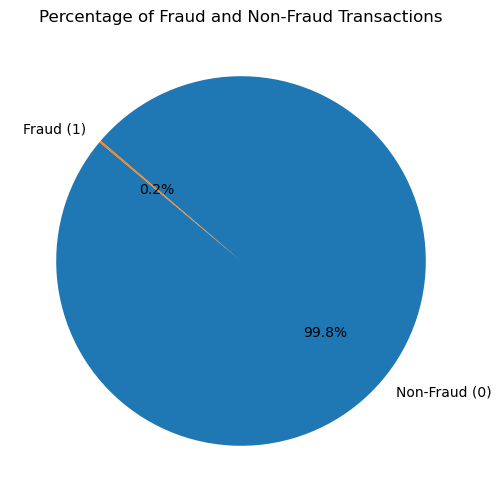

In [7]:

plt.figure(figsize=(8, 6))
fraud_percent = df['Class'].value_counts(normalize=True) * 100
plt.pie(fraud_percent, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Fraud and Non-Fraud Transactions')
plt.show()

### SMOTE

#### What is SMOTE?
SMOTE, or Synthetic Minority Over-sampling Technique, is a method used to address the problem of class imbalance in machine learning. Class imbalance occurs when the number of instances of one class significantly outnumbers the instances of other classes. This can lead to biased models that perform poorly on the minority class. 

#### How SMOTE Works:
- Identifying the Minority Class: SMOTE first identifies the minority class that needs to be over-sampled to balance the class distribution.

- Synthesizing New Samples: For each instance in the minority class, SMOTE finds its k-nearest neighbors (k is usually 5). These neighbors are chosen from the minority class only.

- Creating Synthetic Points: For each minority class sample and its neighbors, SMOTE creates synthetic samples. It does this by randomly choosing one of the k-nearest neighbors and then randomly choosing a point along the line that connects the instance and its chosen neighbor.

- Adding to the Dataset: These synthetic samples are then added to the original dataset. The process continues until the class distribution is more balanced.

In [8]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Scale the 'Time' and 'Amount' features
scaler = StandardScaler()
df['Scaled_Time'] = scaler.fit_transform(df[['Time']])
df['Scaled_Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the original 'Time' and 'Amount' features and use the scaled versions
X = df.drop(['Time', 'Amount', 'Class'], axis=1)
X['Scaled_Time'] = df['Scaled_Time']
X['Scaled_Amount'] = df['Scaled_Amount']

# Target variable
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# X_resampled and y_resampled can now be used to train your model
print('Resampled dataset shape %s' % Counter(y_resampled))



Resampled dataset shape Counter({0: 227451, 1: 227451})


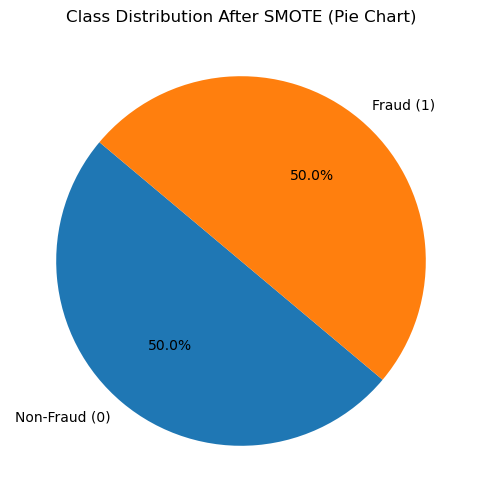

In [9]:

# Plotting the pie chart again
class_counts = y_resampled.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Class Distribution After SMOTE (Pie Chart)')
plt.ylabel('')  
plt.show()

We can see that now our dataset is balanced after using SMOTE.

## EDA

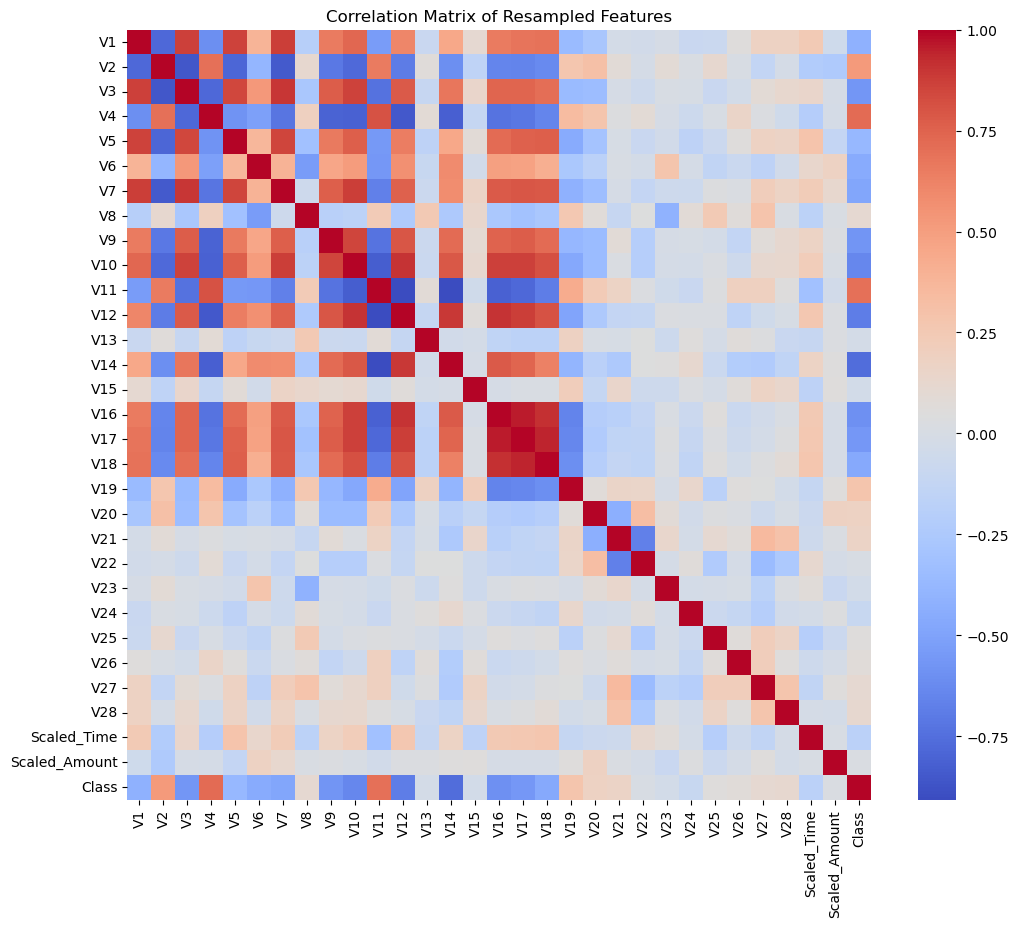

In [10]:

import seaborn as sns
# Calculate the correlation matrix
combined_df = pd.DataFrame(X_resampled, columns=X_train.columns)
combined_df["Class"] = pd.DataFrame(y_resampled)['Class']
X_resampled.drop('Class', axis=1, inplace=True)
# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Resampled Features")
plt.show()

The heatmap indicates a strong negative correlation between features V10, V12, V14, V16 and the target variable 'Class'. The low values of these features are associated with the transaction being fraudulent. And there is a strong positive correlation between features V2, V4, V11, V19 and 'Class'. The high values of these features are associated with the transaction being normal.


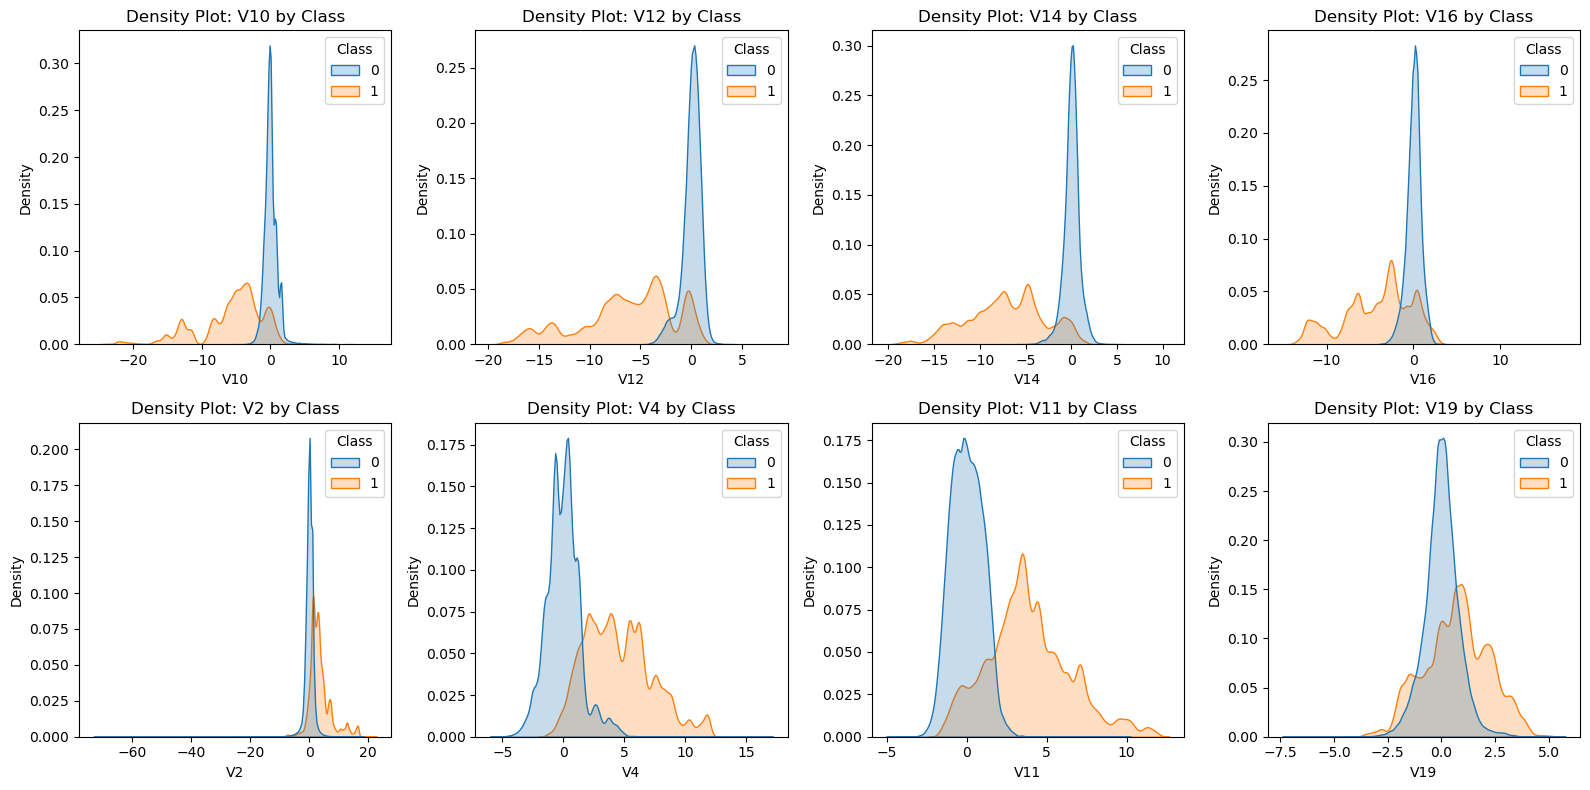

In [94]:
# Density Plots for each feature against the class
plt.figure(figsize=(16, 8))

# Features to be plotted against the class
features_to_plot = ['V10', 'V12', 'V14', 'V16', 'V2', 'V4', 'V11', 'V19']

# Create subplots for each feature
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.kdeplot(data=combined_df, x=feature, hue='Class', fill=True)
    plt.title(f'Density Plot: {feature} by Class')

plt.tight_layout()
plt.show()


Class Separation: If the peaks of the distributions for Class 0 and Class 1 are well-separated (not overlapping much), it implies that the feature is good at distinguishing between the classes. This is evident for features like V10, V12, V14, and V16.

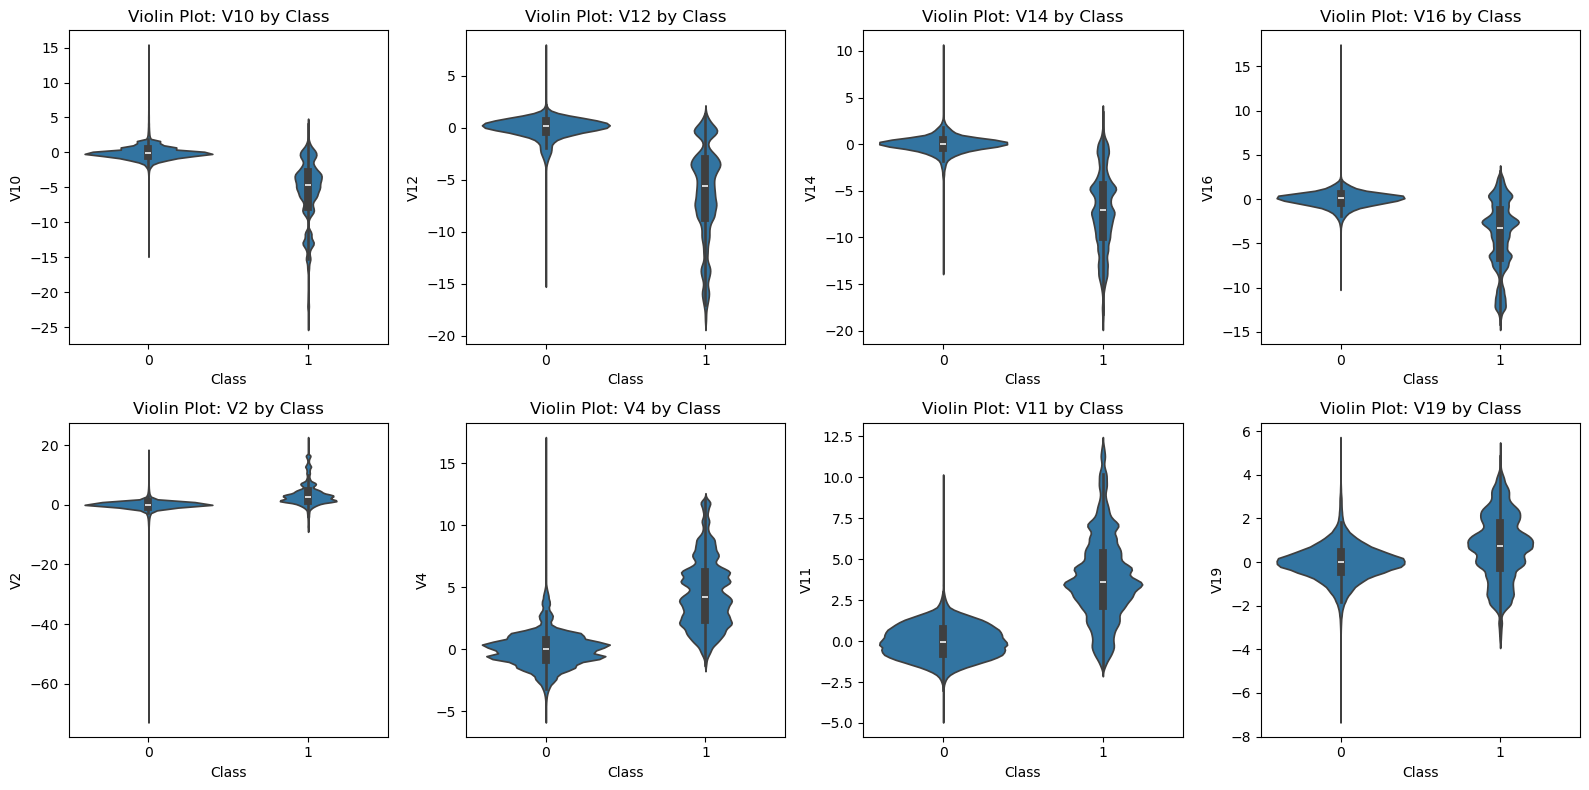

In [71]:
# Violin plots for each feature against the class
plt.figure(figsize=(16, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(data=resampled_df, x='Class', y=feature)
    plt.title(f'Violin Plot: {feature} by Class')

plt.tight_layout()
plt.show()

We still see that V10, V12, V14, V16 have less overlappings, which indicates better discriminative power of the feature.

## Classifiers

### Gaussian Naive Bayes
#### What's Gaussian Naive Bayes
Gaussian Naive Bayes is a variant of the Naive Bayes algorithm, a popular and straightforward machine learning technique used for classification tasks. The "Naive" part of the name comes from the algorithm's fundamental assumption: the independence of features in the dataset. The "Gaussian" part refers to the assumption that the continuous values associated with each class are distributed according to a Gaussian (or normal) distribution.

#### How it works?
- Class Probabilities: In a classification problem, you start with a set of classes and a dataset of features. Gaussian Naive Bayes first calculates the prior probabilities of each class. This is typically the frequency of each class in the training set.

- Feature Likelihoods with Gaussian Assumption: For each feature, the algorithm computes the likelihood of that feature given each class. Gaussian Naive Bayes assumes that the likelihood of the features is Gaussian, so it calculates the mean and variance of the features for each class.

- Applying Bayes' Theorem: When making a prediction, the algorithm applies Bayes' Theorem. It multiplies the prior probabilities of each class with the likelihood of the given feature values to calculate the posterior probability for each class. The class with the highest posterior probability is the predicted class.

- Independence Assumption: The "naive" aspect assumes that all features are independent of each other given the class. This means the likelihood of a set of feature values is the product of the likelihood of each individual feature value.

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the resampled training data
gnb.fit(X_resampled, y_resampled)

# Predict the class labels for the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy of Gaussian Naive Bayes: {accuracy}\n")
print("Gaussian Naive Bayes Classification Report:")
print(class_report)
print("\nGaussian Naive Bayes Confusion Matrix:")
print(conf_matrix)


Accuracy of Gaussian Naive Bayes: 0.9762297672132298

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Gaussian Naive Bayes Confusion Matrix:
[[55523  1341]
 [   13    85]]


- Accuracy:The model has an accuracy of approximately 97.62%. While this is a high value, accuracy alone can be misleading in imbalanced datasets, where the majority class (non-fraud) dominates.

- Classification Report: Class 0 (Non-Fraud): The precision is nearly 100%, indicating that almost all transactions predicted as non-fraudulent are indeed non-fraudulent. The recall is 98%, meaning the model correctly identifies 98% of the actual non-fraudulent transactions. The F1-score of 0.99 suggests a strong balance between precision and recall for the non-fraud class. Class 1 (Fraud): The precision is only 6%, which is quite low. This means that only 6% of transactions predicted as fraudulent are actually fraudulent, indicating a high number of false positives. The recall, however, is high at 87%. This indicates the model is good at detecting actual fraudulent transactions. The F1-score of 0.11 is low, largely due to the low precision.

- Confusion Matrix: The model correctly identified 55,523 of the non-fraudulent transactions (true negatives) but made 1,341 false positives (non-fraudulent transactions incorrectly classified as fraud). It correctly identified 85 of the fraudulent transactions (true positives) with 13 false negatives (fraudulent transactions not detected).

#### Conclusion:
- The Gaussian Naive Bayes model demonstrates good recall for detecting fraudulent transactions, which is crucial in fraud detection scenarios. However, its precision for the fraud class is very low, leading to many false positives.

- The balance between recall and precision is vital in fraud detection systems. While a high recall rate is desirable to capture as much fraud as possible, the low precision could result in a high number of false alarms, potentially causing operational inefficiencies.

### Logistic Regression

#### What is Logistic Regression?
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). 

#### How it works?
- Modeling Probabilities: Unlike linear regression which outputs a continuous value, logistic regression is used for binary classification problems (where the output is either 0 or 1). It models the probability that a given input point belongs to a certain class.

- Sigmoid Function: The core of the model is the logistic function, also known as the sigmoid function, which is an S-shaped curve. It can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

- Making Predictions: The logistic regression model calculates the probability that a given input point belongs to a certain class (e.g., class 1). If the probability is greater than 0.5, the point is classified into class 1; otherwise, it falls into class 0.

- Training the Model: The process of training a logistic regression model involves adjusting the parameters (weights and bias) to minimize the difference between the predicted probabilities and the actual class labels in the training data. This is typically done using a cost function like the log loss (binary cross-entropy loss) and an optimization algorithm like gradient descent.

- Odds Ratio: In logistic regression, the odds ratio for a variable explains the change in odds of the outcome occurring (probability of outcome happening divided by the probability of it not happening) for a one-unit increase in the variable.

- Interpretation: The coefficients in logistic regression are in terms of odds, meaning that they describe the change in the odds of the outcome occurring for a one-unit change in the predictor variable, holding all other variables constant.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression()

# Train the classifier on the resampled training data
log_reg.fit(X_resampled, y_resampled)

# Predict the class labels for the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy of Logistic Regression: {accuracy}\n")
print("Logistic Regression Classification Report:")
print(class_report)
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix)

Accuracy of Logistic Regression: 0.9745268775675011

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


Logistic Regression Confusion Matrix:
[[55420  1444]
 [    7    91]]


- Accuracy:The model has an accuracy of approximately 97.45%. While this seems high, accuracy can be misleading in imbalanced datasets (like typical fraud detection scenarios).

- Classification Report: Class 0 (Non-Fraud): Precision is nearly 100%, meaning almost all transactions predicted as non-fraudulent are indeed non-fraudulent. Recall is 97%, suggesting that the model correctly identifies 97% of actual non-fraudulent transactions. The F1-score of 0.99 indicates a strong balance between precision and recall for this class. Class 1 (Fraud): Precision is low at 6%, indicating that only 6% of transactions predicted as fraudulent are truly fraudulent. This points to a high number of false positives. The recall is very high at 93%, indicating the model is highly effective at identifying actual fraudulent transactions. The F1-score of 0.11 is low, mainly due to the low precision.

- Confusion Matrix: The model correctly identified 55,420 non-fraudulent transactions (true negatives) but incorrectly labeled 1,444 as fraudulent (false positives). It correctly identified 91 of the fraudulent transactions (true positives) with only 7 false negatives (fraudulent transactions not detected).

#### Conclusion:
- The Logistic Regression model shows excellent performance in terms of recall for the fraud class, which is crucial in fraud detection scenarios. However, the precision for the fraud class is very low, leading to a large number of false positives. This means while the model is good at catching fraud, it also misclassifies many legitimate transactions as fraudulent.

- The balance between recall and precision is vital in fraud detection. A high recall is desired to capture as much fraud as possible, but the low precision could result in operational inefficiencies due to a high number of false alarms.

### Random Forest

#### What is Random Forests?
- Random Forest is an ensemble learning method used for classification and regression that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

#### How it works?

- Bootstrap Aggregating (Bagging): Random Forest starts with the principle of bootstrap aggregating, or bagging, to improve the stability and accuracy of machine learning algorithms. It involves creating multiple subsets of the original dataset with replacement (meaning the same data point can appear more than once in a subset), which are used to train different decision trees.

- Building Decision Trees: For each bootstrap sample, a decision tree is grown. During the construction of these trees, only a random subset of features is considered for splitting at each node, which is a key difference from a single decision tree. This randomness helps to make the model more robust to variance in the data and avoids overfitting, as no single tree will dictate the outcome. The trees in a Random Forest grow to their maximum length and are not pruned.

- Aggregating Predictions: For classification tasks, the prediction of the Random Forest is the majority vote of the predictions from all individual trees. For regression tasks, it is typically the average of the predictions from all trees.

- Feature Importance: An added benefit of Random Forest is its ability to do feature selection. The algorithm can rank the importance of different features based on how much they decrease the impurity in the nodes of the trees.

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled training data
rf_clf.fit(X_resampled, y_resampled)

# Predict the class labels for the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the performance metrics
print(f"Accuracy of Random Forest: {accuracy_rf}\n")
print("Random Forest Classification Report:")
print(class_report_rf)
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

Accuracy of Random Forest: 0.9995435553526912

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest Confusion Matrix:
[[56854    10]
 [   16    82]]


#### Review the Trees

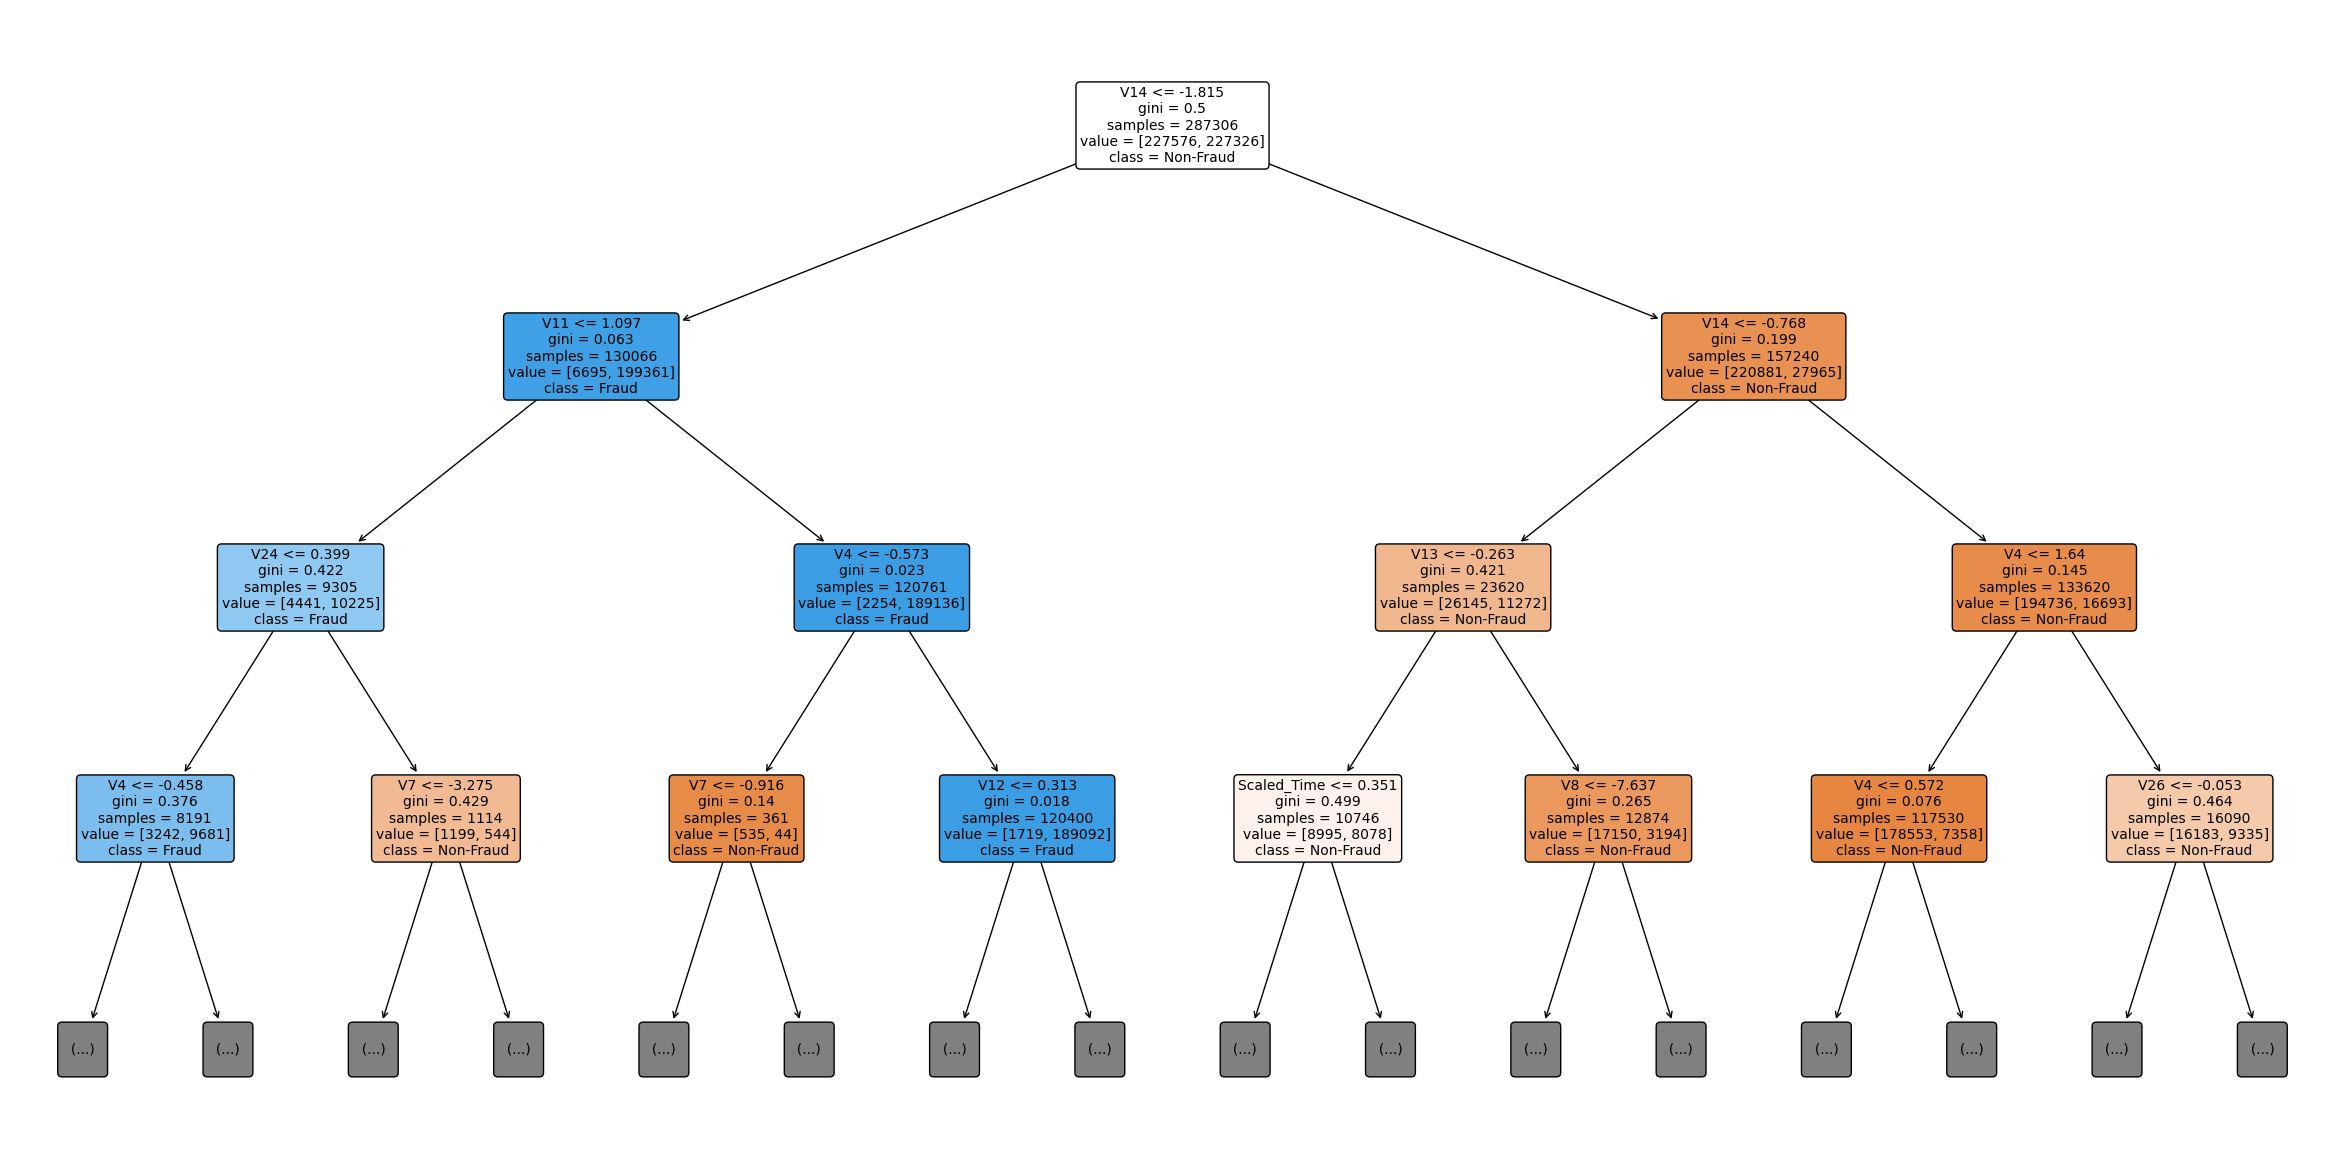

In [106]:
from sklearn.tree import plot_tree

chosen_tree = rf_clf.estimators_[0]

# Increase the figure size for better clarity
plt.figure(figsize=(30, 15))

# Plot the decision tree with better readability
plot_tree(chosen_tree, 
          feature_names=X_train.columns,  
          class_names=['Non-Fraud', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limiting the depth for visualization

# Show the plot with adjusted figure size
plt.show()

- Accuracy: The model achieved an extremely high accuracy of about 99.95%. This suggests that the model is highly effective in correctly classifying the transactions in your dataset.

- Classification Report: Class 0 (Non-Fraud): Precision and recall are both nearly 100%, indicating an excellent performance in identifying non-fraudulent transactions accurately. The F1-score, which is the harmonic mean of precision and recall, is also 1.00, reflecting a perfect balance between precision and recall for non-fraudulent transactions. Class 1 (Fraud): Precision is 0.89, meaning that 89% of transactions predicted as fraudulent are actually fraudulent. This is a good result, especially considering the challenge of false positives in fraud detection. The recall is 0.84, indicating that the model successfully identifies 84% of all fraudulent transactions. This is a crucial metric in fraud detection, as missing fraudulent transactions can have significant consequences. The F1-score of 0.86 is a strong result, indicating a good balance between precision and recall for detecting fraudulent transactions.

- Confusion Matrix: The model correctly identified 56,854 of the non-fraudulent transactions (true negatives) and made only 10 false positives (non-fraudulent transactions incorrectly classified as fraud). It correctly identified 82 of the fraudulent transactions (true positives) but missed 16 (false negatives).

#### Conclusion:
- The Random Forest model demonstrates outstanding overall performance, with nearly perfect classification of non-fraudulent transactions and very good results for the fraud class.

- The balance between false positives and false negatives is excellent. The low number of false positives is particularly important in practical scenarios where false alarms can lead to unnecessary investigations and customer inconvenience.

- The relatively higher false negatives compared to false positives suggest a slightly more conservative approach in labeling transactions as fraudulent, which is generally preferable in fraud detection systems.


### Stochastic Gradient Descent

#### What is Stochastic Gradient Descent?
Stochastic Gradient Descent (SGD) is an optimization algorithm widely used in machine learning, especially for large-scale and online learning problems. It's a variation of Gradient Descent, a method used to find the minimum of a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

#### How it works?
- Objective Function: In machine learning, you typically have an objective function (often a loss function) that measures how well your model is performing. The goal is to minimize this loss function.

- Gradient Computation: The gradient of the loss function with respect to the model's parameters tells you how to adjust the parameters to decrease the loss. In full-batch Gradient Descent, you would compute the gradient using all the data.

- Stochastic Approach: Instead of using the entire dataset to compute the true gradient, SGD randomly samples one data point (or a small batch) at a time and computes an estimate of the gradient (stochastic gradient). This estimate is noisier but much faster to compute.

- Parameter Update: The model parameters are then updated in the direction opposite to the stochastic gradient. This step is repeated for many iterations.

- Learning Rate: The size of the update step is controlled by a parameter called the learning rate. If the learning rate is too high, the algorithm might overshoot the minimum; if it's too low, the algorithm might take too long to converge or get stuck in a local minimum.

- Convergence: Ideally, as the number of iterations increases, the algorithm will converge to the minimum (or a minimum if there are many) of the loss function.


In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Stochastic Gradient Descent (SGD) classifier
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier on the resampled training data
sgd_clf.fit(X_resampled, y_resampled)

# Predict the class labels for the test set
y_pred_sgd = sgd_clf.predict(X_test)

# Calculate the accuracy score, classification report, and confusion matrix
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
class_report_sgd = classification_report(y_test, y_pred_sgd)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Print the performance metrics
print(f"Accuracy of SGD Classifier: {accuracy_sgd}\n")
print("SGD Classifier Classification Report:")
print(class_report_sgd)
print("\nSGD Classifier Confusion Matrix:")
print(conf_matrix_sgd)

Accuracy of SGD Classifier: 0.967609985604438

SGD Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962


SGD Classifier Confusion Matrix:
[[55027  1837]
 [    8    90]]


- Accuracy: The overall accuracy is about 96.76%, which is relatively high. However, in the context of imbalanced datasets like fraud detection, accuracy is not always the best indicator of performance.

- Classification Report: Class 0 (Non-Fraud): Precision is almost 100%, indicating that nearly all transactions predicted as non-fraudulent are actually non-fraudulent. Recall is 97%, meaning the model correctly identifies 97% of all actual non-fraudulent transactions. The F1-score of 0.98 reflects a strong balance between precision and recall for the non-fraud class. Class 1 (Fraud): Precision is only 5%, which is quite low. This means that only 5% of transactions predicted as fraudulent are truly fraudulent, indicating a high number of false positives (non-fraudulent transactions incorrectly labeled as fraud). The recall, however, is 92%, suggesting the model is good at capturing actual fraudulent transactions. The F1-score of 0.09 is low due to the low precision.

- Confusion Matrix: The model correctly identified 55,027 of the non-fraudulent transactions (true negatives) but incorrectly labeled 1,837 as fraudulent (false positives). It correctly identified 90 of the fraudulent transactions (true positives) but missed 8 (false negatives).

#### Conclusion:
- The model demonstrates good recall for both classes but struggles with precision for the fraud class. This is a common challenge in imbalanced datasets where the minority class (fraudulent transactions) is much smaller than the majority class.

- The high number of false positives could be a significant issue in a practical scenario. While the model is adept at catching fraudulent transactions, it also misclassifies a large number of non-fraudulent transactions as fraud.


### XGBoost

In [16]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the classifier on the resampled training data
xgb_clf.fit(X_resampled, y_resampled)

# Predict the class labels for the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate the accuracy score, classification report, and confusion matrix
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the performance metrics
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb}\n")
print("XGBoost Classifier Classification Report:")
print(class_report_xgb)
print("\nXGBoost Classifier Confusion Matrix:")
print(conf_matrix_xgb)

Accuracy of XGBoost Classifier: 0.9992275552122467

XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962


XGBoost Classifier Confusion Matrix:
[[56835    29]
 [   15    83]]


- Accuracy:The model has an accuracy of about 99.92%, which is extremely high. This suggests that the model is very effective in correctly classifying transactions in your dataset.

- Classification Report: Class 0 (Non-Fraud):The precision is nearly 100%, indicating that almost all transactions predicted as non-fraudulent are indeed non-fraudulent. The recall is also nearly 100%, meaning the model is very good at identifying actual non-fraudulent transactions. The F1-score, which is a balance between precision and recall, is consequently also very high. Class 1 (Fraud): The precision is 74%, which means that 74% of transactions predicted as fraudulent are truly fraudulent. While this is lower than for non-fraudulent transactions, it's still a good result, especially in fraud detection where false positives can be common. The recall is 85%, indicating that the model successfully identifies 85% of all fraudulent transactions. This is a crucial metric in fraud detection, as failing to detect fraud can have significant consequences. The F1-score of 0.79 is a good balance between precision and recall for the fraud class.

- Confusion Matrix: The model correctly identified 56,835 of the non-fraudulent transactions (true negatives) and made 29 false positives (non-fraudulent transactions incorrectly classified as fraud). It correctly identified 83 of the fraudulent transactions (true positives) and had 15 false negatives (fraudulent transactions not detected).

#### Conclusion:
- The model is highly effective for this dataset, with excellent accuracy and good recall for the fraudulent class.

- The relatively lower precision for the fraud class (compared to the non-fraud class) is not uncommon in fraud detection scenarios, where the actual cases of fraud are much rarer than non-fraud cases.

- The balance between false positives and false negatives is crucial in fraud detection. While false negatives (missed fraud) have direct financial implications, a high number of false positives can lead to operational inefficiencies and customer dissatisfaction.

## Final Conclusion
### Gaussian Naive Bayes and Logistic Regression:

- Both classifiers show very high recall rates for the fraud class (87% for Gaussian Naive Bayes and 93% for Logistic Regression), which is crucial in fraud detection scenarios as it indicates the models' effectiveness in identifying fraudulent transactions.
- However, they have very low precision for the fraud class (6% for both), resulting in a high number of false positives (non-fraudulent transactions wrongly classified as fraudulent). This could lead to operational inefficiencies due to a large number of false alarms.
- The high accuracy rates (around 97.6% and 97.45%, respectively) are slightly misleading due to the imbalanced nature of the dataset, where the non-fraud class dominates.
### Random Forest:

- Exhibits the best overall performance with a very high accuracy of 99.95%, and a well-balanced precision (89%) and recall (84%) for the fraud class.
- Demonstrates strong capability in both identifying and correctly classifying fraudulent transactions with minimal false positives and false negatives.
- The high precision reduces the risk of false alarms, making it a robust choice for practical applications in fraud detection.
### Stochastic Gradient Descent (SGD):

- Shows good recall for the fraud class (92%) but, similar to Gaussian Naive Bayes and Logistic Regression, suffers from low precision (5%).
- The model is effective in detecting fraud but at the cost of a high false positive rate, which might not be ideal for practical applications.
### XGBoost:

- Provides a strong balance between precision (74%) and recall (85%) for the fraud class, with an overall accuracy of 99.92%.
- Strikes a good balance between detecting fraudulent transactions and maintaining a lower rate of false positives, making it a viable option for fraud detection.
### Overall Recommendation:
- Random Forest and XGBoost stand out as the most effective models for this specific task, with Random Forest slightly edging out due to its higher precision.
- While Gaussian Naive Bayes and Logistic Regression are effective in identifying fraud, their practicality is limited by the high number of false positives.
- Regular model evaluation and updates are recommended to maintain performance and adapt to evolving patterns in fraudulent activities.
- It's important to consider the trade-offs between different types of errors (false positives vs. false negatives) and choose the model that best aligns with the specific needs and costs associated with the fraud detection system in use.





